In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1.

In [18]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

#2.

In [19]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train[['datetime', 'year', 'month', 'day', 'hour', 'minute', 'second']].head()

,datetime,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


#3

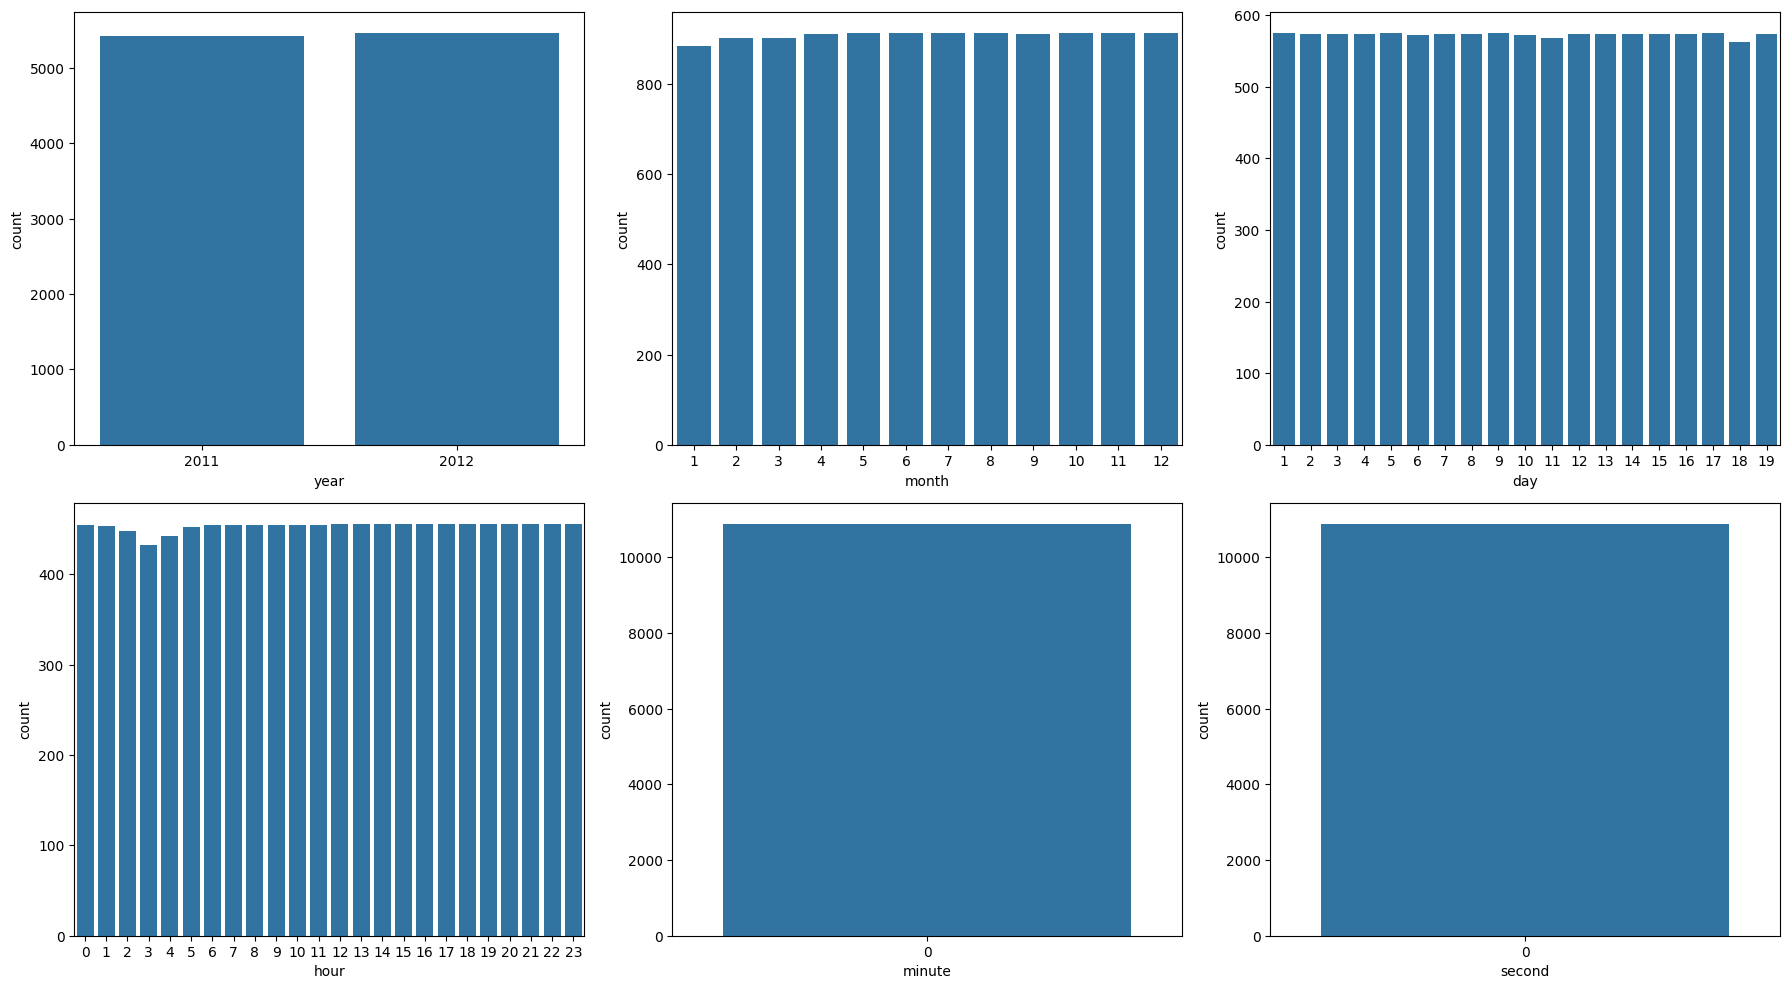

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(data=train, x='year', ax=axes[0, 0])
sns.countplot(data=train, x='month', ax=axes[0, 1])
sns.countplot(data=train, x='day', ax=axes[0, 2])
sns.countplot(data=train, x='hour', ax=axes[1, 0])
sns.countplot(data=train, x='minute', ax=axes[1, 1])
sns.countplot(data=train, x='second', ax=axes[1, 2])
plt.tight_layout()
plt.show()

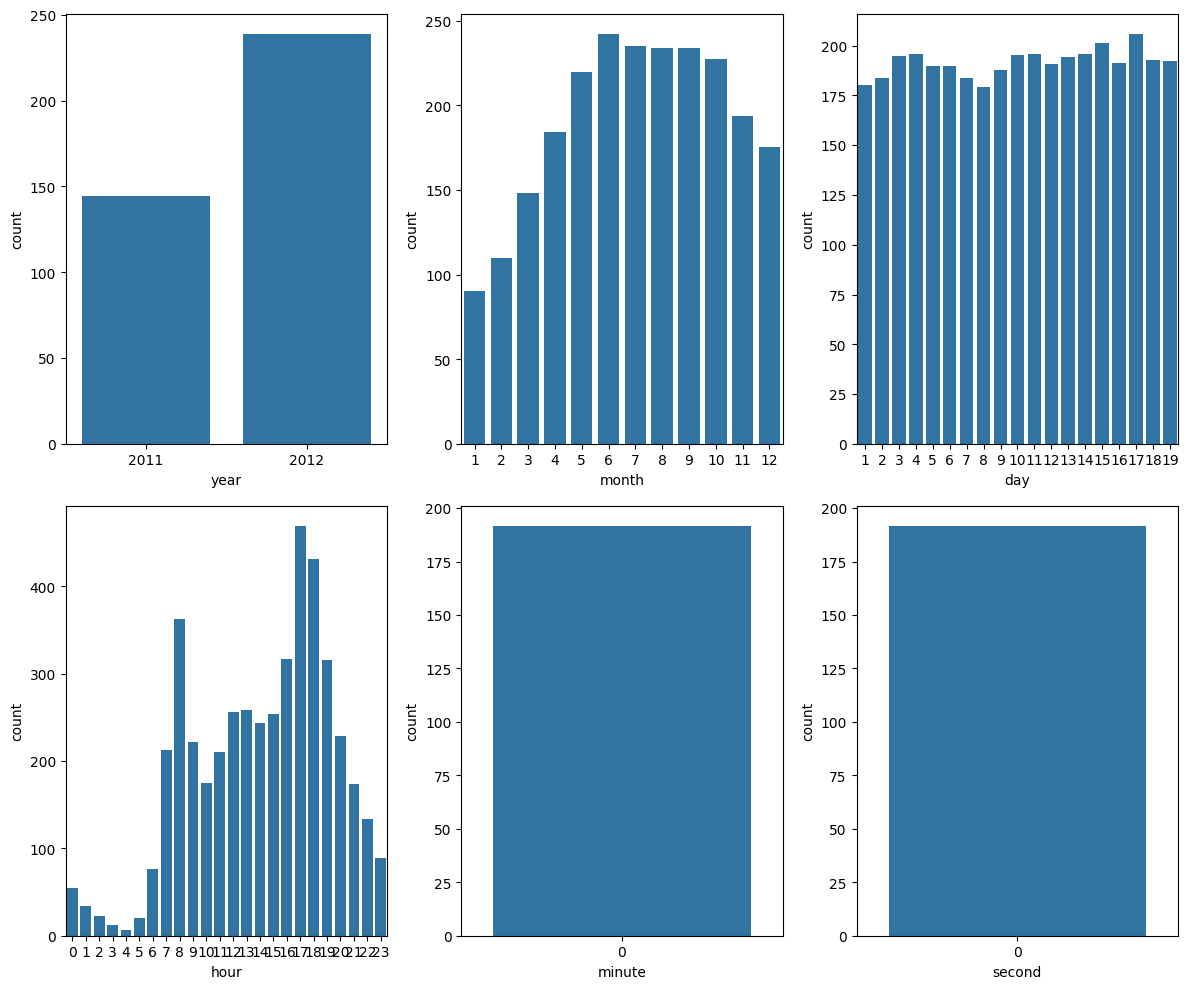

In [36]:
fig = plt.figure(figsize=[12,10])

ax1 = fig.add_subplot(2,3,1)
ax1 = sns.barplot(x='year',y='count',data=train.groupby('year')['count'].mean().reset_index())
ax2 = fig.add_subplot(2,3,2)
ax2 = sns.barplot(x='month',y='count',data=train.groupby('month')['count'].mean().reset_index())
ax3 = fig.add_subplot(2,3,3)
ax3 = sns.barplot(x='day',y='count',data=train.groupby('day')['count'].mean().reset_index())
ax4 = fig.add_subplot(2,3,4)
ax4 = sns.barplot(x='hour',y='count',data=train.groupby('hour')['count'].mean().reset_index())
ax5 = fig.add_subplot(2,3,5)
ax5 = sns.barplot(x='minute',y='count',data=train.groupby('minute')['count'].mean().reset_index())
ax4 = fig.add_subplot(2,3,6)
ax4 = sns.barplot(x='second',y='count',data=train.groupby('second')['count'].mean().reset_index())
plt.tight_layout()
plt.show()

#4

In [21]:
from sklearn.model_selection import train_test_split

features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
            'year', 'month', 'day', 'hour']
x = train[features].copy()
y = train['count'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#5

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#6

In [25]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 19945.37
RMSE: 141.23


#7

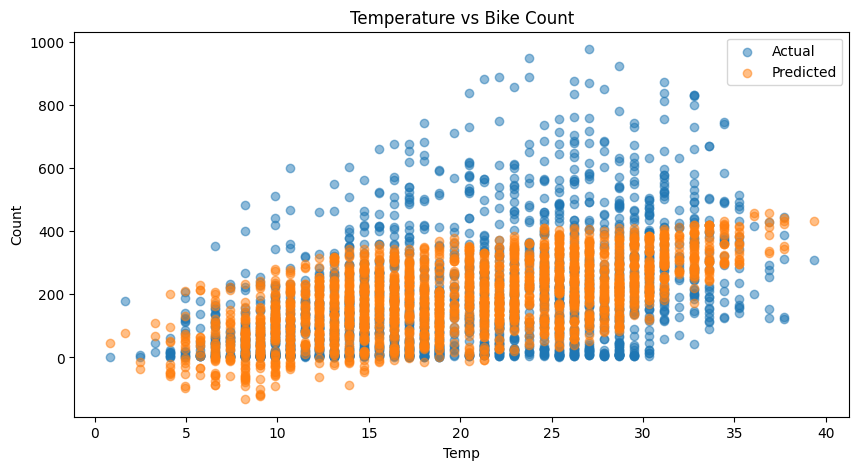

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(x_test['temp'], y_test, label='Actual', alpha=0.5)
plt.scatter(x_test['temp'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Temp')
plt.ylabel('Count')
plt.title('Temperature vs Bike Count')
plt.legend()
plt.show()

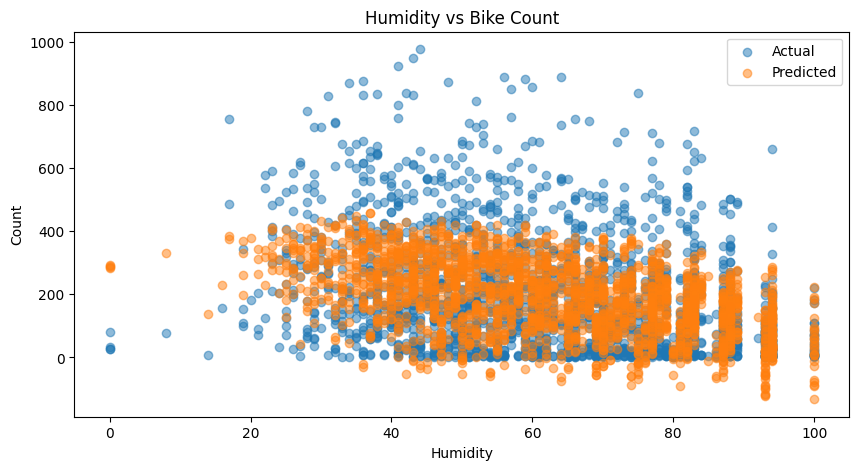

In [28]:
plt.figure(figsize=(10, 5))
plt.scatter(x_test['humidity'], y_test, label='Actual', alpha=0.5)
plt.scatter(x_test['humidity'], y_pred, label='Predicted', alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.title('Humidity vs Bike Count')
plt.legend()
plt.show()